Pair Group 5: Lumie Yang, Xin Ling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 2


## 1. Load the dataset Micro-Organism Image Classification dataset

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

source_directory = '/content/drive/Shareddrives/Data255_Lab/Lab1/Micro_Organism'
target_directory = '/content/drive/Shareddrives/Data255_Lab/Lab1/image_Q2'

if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# New directories for train and test sets
train_dir = os.path.join(target_directory, 'train')
test_dir = os.path.join(target_directory, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split and copy images
def split_and_copy_images(source_directory, train_dir, test_dir, test_size=0.2):
    classes = os.listdir(source_directory)
    for cls in classes:
        class_path = os.path.join(source_directory, cls)
        if not os.path.isdir(class_path):
            continue  # Skip any non-directory entries

        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith('.jpg')]
        train_paths, test_paths = train_test_split(image_paths, test_size=test_size, random_state=42)

        # Prepare target directories for the class
        train_class_dir = os.path.join(train_dir, cls)
        test_class_dir = os.path.join(test_dir, cls)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Copy images to their respective directories
        for path in train_paths:
            shutil.copy(path, train_class_dir)
        for path in test_paths:
            shutil.copy(path, test_class_dir)

# Call the function to split and copy images
split_and_copy_images(source_directory, train_dir, test_dir)

## 2. Explain in your own words:


### a. Gradient Descent (1 point)
Gradient Descent is an optimization algorithm to minimize the cost function in machine learning and deep learning. The method adjusts model parameters to improve accuracy. It operates on the principle of moving in the direction opposite to the gradient of the cost function.
### b. Drop out (1 point)
Dropout is a strategy used in training deep neural networks where randomly set some neurons to zero in the forward pass, helping to reduce overfitting by making the network less sensitive to the specific weights of neurons.
### c. Activation functions (1 point)
Activation functions are mathematical equations that determine the output of a neural network node given an input or set of inputs, introducing non-linearity to the model. The normal ones are sigmoid, tanh, ReLU, etc.
### d. Back Propagation (1 point)
Back Propagation is the process through which a neural network is adjusted in response to the error rate obtained in the previous epoch, specifically by calculating the gradient of the error function with respect to the network's weights.
### e. Epochs, Iterations, and Batch size
Epochs refer to one full cycle through the entire training dataset, iterations are the number of batches needed to complete one epoch, and batch size is the number of training examples utilized in one iteration.

## 3. Visualize/summarize the data

In [ ]:
import os
import matplotlib.pyplot as plt

# Directories
source_directory = '/content/drive/Shareddrives/Data255_Lab/Lab1/Micro_Organism'
target_directory = '/content/drive/Shareddrives/Data255_Lab/Lab1/image_Q2'

train_dir = os.path.join(target_directory, 'train')
test_dir = os.path.join(target_directory, 'test')

classes = [d for d in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, d))]
num_classes = len(classes)

def count_images_and_classes(directory):
    classes = [cls for cls in os.listdir(directory) if os.path.isdir(os.path.join(directory, cls))]
    total_images = sum(len([f for f in os.listdir(os.path.join(directory, cls)) if f.lower().endswith('.jpg')]) for cls in classes)
    return total_images, len(classes)

def print_images_per_class(directory):
    classes = [cls for cls in os.listdir(directory) if os.path.isdir(os.path.join(directory, cls))]
    for cls in classes:
        num_images = len([f for f in os.listdir(os.path.join(directory, cls)) if f.lower().endswith('.jpg')])
        print(f"Class {cls}: {num_images} images")

### a. Number of entities in the training and testing set and number of classes in the target variable

In [ ]:
# Training set
total_train_images, num_train_classes = count_images_and_classes(train_dir)
print(f"Training Set: Total images = {total_train_images}, Number of classes = {num_train_classes}")

# Testing set
total_test_images, num_test_classes = count_images_and_classes(test_dir)
print(f"Test Set: Total images = {total_test_images}, Number of classes = {num_test_classes}")

Training Set: Total images = 656, Number of classes = 8
Test Set: Total images = 195, Number of classes = 8


### b. Number of pixels in the image (Height and width individually)

In [ ]:
from PIL import Image

# Path to the first image
image_path = '/content/drive/Shareddrives/Data255_Lab/Lab1/image_Q2/train/Amoeba/Image_1.jpg'

# Open the image and get its dimensions
with Image.open(image_path) as img:
    width, height = img.size

print(f"Image dimensions (Width x Height): {width} x {height} pixels")

Image dimensions (Width x Height): 480 x 320 pixels


### c. Number of images per class

In [ ]:
# Training set
print(f"Images per class in Training Set:")
print_images_per_class(train_dir)

# Testing set
print(f"\nImages per class in Testing Set:")
print_images_per_class(test_dir)

Images per class in Training Set:
Class Spiral_bacteria: 67 images
Class Rod_bacteria: 73 images
Class Amoeba: 68 images
Class Spherical_bacteria: 84 images
Class Hydra: 60 images
Class Yeast: 58 images
Class Paramecium: 117 images
Class Euglena: 129 images

Images per class in Testing Set:
Class Spiral_bacteria: 26 images
Class Rod_bacteria: 29 images
Class Amoeba: 27 images
Class Spherical_bacteria: 19 images
Class Hydra: 16 images
Class Yeast: 15 images
Class Paramecium: 30 images
Class Euglena: 33 images


### d. Display at least 2 images of each class

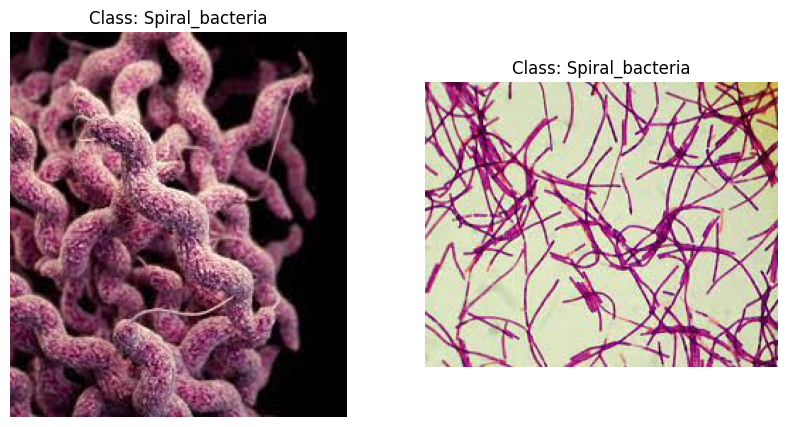

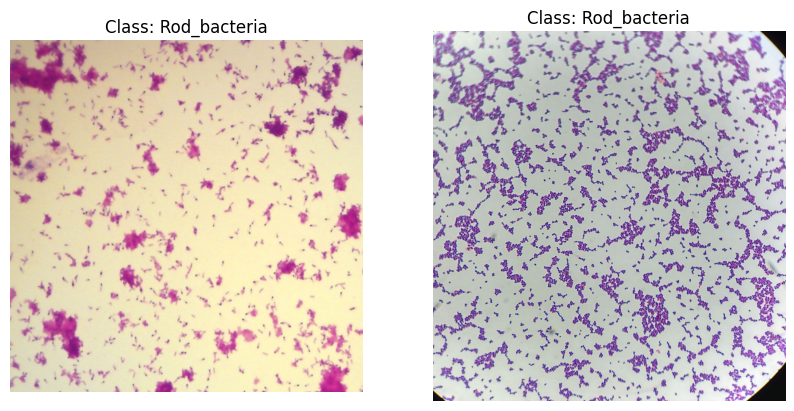

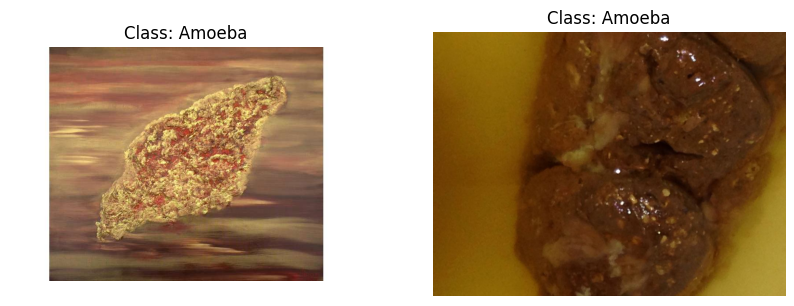

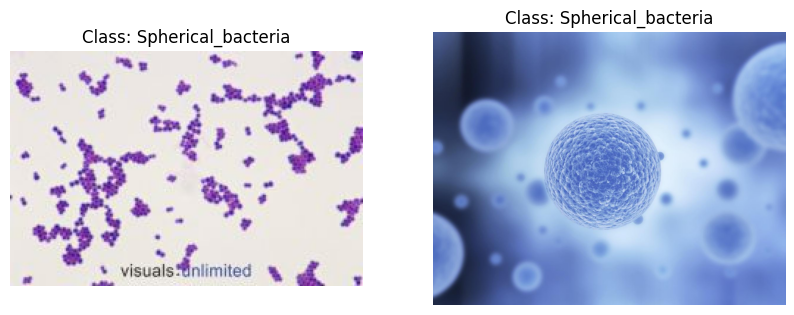

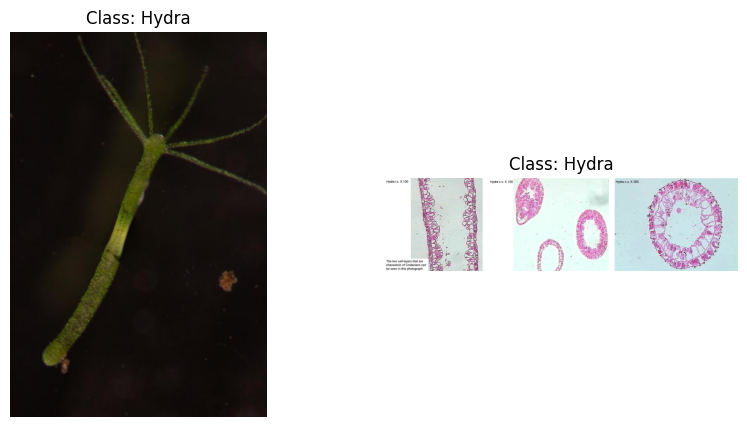

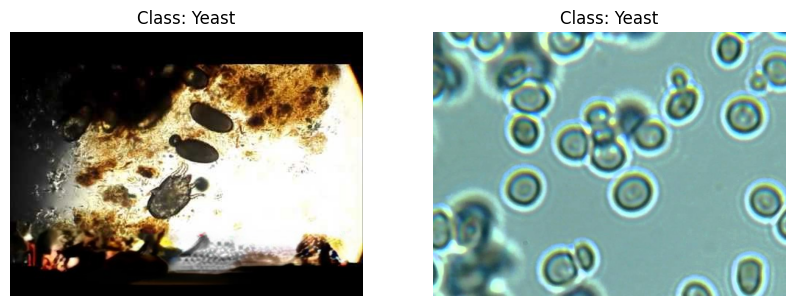

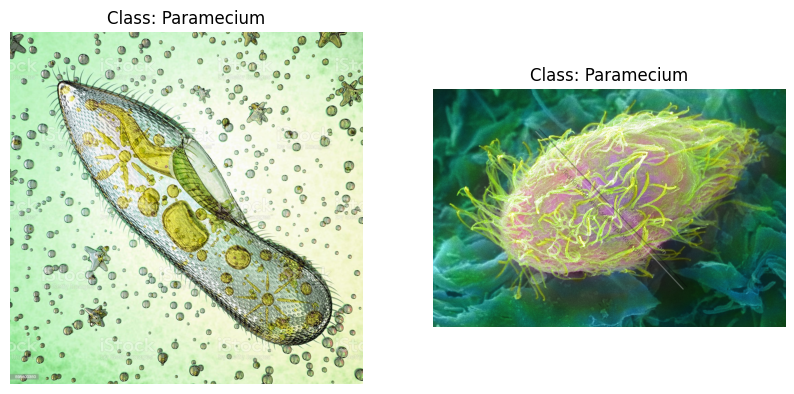

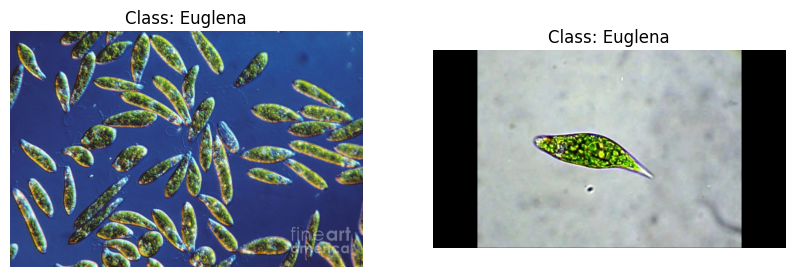

In [ ]:
for class_dir in classes:
    class_path = os.path.join(source_directory, class_dir)
    image_files = [name for name in os.listdir(class_path) if name.lower().endswith('.jpg')][:2]  # Get first two images

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    for idx, image_file in enumerate(image_files):
        img_path = os.path.join(class_path, image_file)
        img = Image.open(img_path)
        axs[idx].imshow(img)
        axs[idx].set_title(f"Class: {class_dir}")
        axs[idx].axis('off')
    plt.show()

## 4. Train a neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((240, 210)),  # Resize to the specified dimensions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard normalization
])

# Load datasets
train_dataset = datasets.ImageFolder(root='/content/drive/Shareddrives/Data255_Lab/Lab1/image_Q2/train', transform=transform)
test_dataset = datasets.ImageFolder(root='/content/drive/Shareddrives/Data255_Lab/Lab1/image_Q2/test', transform=transform)

# Create dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [ ]:
def train_model(model, train_loader, optimizer, loss_function, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the model on test images: {100 * correct / total}%')

### a. Decide the number of layers and neurons in each layer

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 60 * 52, 128)  # Adjusted based on the output size after convolution and pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 60 * 52)  # Flatten the output for the dense layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleCNN(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, optimizer, loss_function, num_epochs=10)
test_model(model, test_loader)

Epoch 1/10, Loss: 2.135192553202311
Epoch 2/10, Loss: 2.0772557258605957
Epoch 3/10, Loss: 1.9866245530900501
Epoch 4/10, Loss: 1.7967498415992373
Epoch 5/10, Loss: 1.5604097161974226
Epoch 6/10, Loss: 1.1879880144482566
Epoch 7/10, Loss: 0.8016064848218646
Epoch 8/10, Loss: 0.48014367123444873
Epoch 9/10, Loss: 0.3296764273019064
Epoch 10/10, Loss: 0.25266838499477934
Accuracy of the model on test images: 57.43589743589744%


### b. Try out different activation functions (explain each one you used)

**Relu**: In the previous question a, we used Relu as the activation function. It's defined as f(x) = max(0, x) and outputs the input if it is positive and zero otherwise. It is used for its simplicity and ability to reduce the likelihood of vanishing gradients.

**Leaky ReLU**: It's a variation of ReLU, given by f(x) = x for x > 0, f(x) = αx for x ≤ 0 (where α is a small constant). It allows a small, non-zero gradient when the input is negative. It helps to keep the gradient flow alive during training.

In [ ]:
class SimpleCNN_LeakyReLU(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN_LeakyReLU, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 60 * 52, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.leakyrelu = nn.LeakyReLU(0.01)  # LeakyReLU activation

    def forward(self, x):
        x = self.pool(self.leakyrelu(self.conv1(x)))
        x = self.pool(self.leakyrelu(self.conv2(x)))
        x = x.view(-1, 64 * 60 * 52)
        x = self.leakyrelu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleCNN_LeakyReLU(num_c lasses=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, optimizer, loss_function, num_epochs=10)
test_model(model, test_loader)

Epoch 1/10, Loss: 4.488387913930984
Epoch 2/10, Loss: 1.799876985095796
Epoch 3/10, Loss: 1.3227178312483288
Epoch 4/10, Loss: 0.7841756542523702
Epoch 5/10, Loss: 0.4626472322713761
Epoch 6/10, Loss: 0.26237781736112775
Epoch 7/10, Loss: 0.18166527418153627
Epoch 8/10, Loss: 0.18019590349424452
Epoch 9/10, Loss: 0.1319695303127879
Epoch 10/10, Loss: 0.15668980735132382
Accuracy of the model on test images: 66.15384615384616%


**ELU**: Given by f(x) = x for x ≥ 0, f(x) = α(e^x - 1) for x < 0. For positive values of x, ELU behaves just like ReLU. For negative values, it outputs a small exponential decay, which can help reduce the vanishing gradient problem more smoothly.

In [ ]:
class SimpleCNN_ELU(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN_ELU, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 60 * 52, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.elu = nn.ELU()  # ELU activation

    def forward(self, x):
        x = self.pool(self.elu(self.conv1(x)))
        x = self.pool(self.elu(self.conv2(x)))
        x = x.view(-1, 64 * 60 * 52)
        x = self.elu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleCNN_ELU(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, optimizer, loss_function, num_epochs=10)
test_model(model, test_loader)

Epoch 1/10, Loss: 5.498849789301555
Epoch 2/10, Loss: 2.01777454217275
Epoch 3/10, Loss: 1.9730207920074463
Epoch 4/10, Loss: 1.9184526943025135
Epoch 5/10, Loss: 1.8693960053580148
Epoch 6/10, Loss: 1.8546336264837355
Epoch 7/10, Loss: 1.8587794985089983
Epoch 8/10, Loss: 1.7494822627022153
Epoch 9/10, Loss: 1.721413879167466
Epoch 10/10, Loss: 1.6869244291668846
Accuracy of the model on test images: 27.17948717948718%


### c. Try with and without using dropout

Since the activation function of **LeakyReLU** had the highest accuracy in questions a and b, the following questions will use LeakyReLU.

The LeakyReLU model previously did not have dropout layers, so in this question c, we will just modify the LeakyReLU mode to include dropout layers.

In [ ]:
class SimpleCNN_LeakyReLU_Dropout(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN_LeakyReLU_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer after pooling
        self.fc1 = nn.Linear(64 * 60 * 52, 128)
        self.dropout2 = nn.Dropout(0.5)  # Dropout before the final layer
        self.fc2 = nn.Linear(128, num_classes)
        self.leakyrelu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = self.pool(self.leakyrelu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(self.leakyrelu(self.conv2(x)))
        x = x.view(-1, 64 * 60 * 52)
        x = self.leakyrelu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
dropout_model = SimpleCNN_LeakyReLU_Dropout(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dropout_model.parameters(), lr=0.001)

train_model(dropout_model, train_loader, optimizer, loss_function, num_epochs=10)
test_model(dropout_model, test_loader)

Epoch 1/10, Loss: 9.91809446471078
Epoch 2/10, Loss: 2.150929019564674
Epoch 3/10, Loss: 2.0181084814525785
Epoch 4/10, Loss: 2.0268949440547397
Epoch 5/10, Loss: 2.006636386825925
Epoch 6/10, Loss: 1.9509645132791429
Epoch 7/10, Loss: 1.9054762806211198
Epoch 8/10, Loss: 1.8101825430279685
Epoch 9/10, Loss: 1.7443366788682484
Epoch 10/10, Loss: 1.597559128488813
Accuracy of the model on test images: 31.28205128205128%


The accuracy of model with dropout is lower than without dropout.

### d. Try different regularizations apart from dropout

**LeakyReLU + L2 Regularization**

In [ ]:
model_l2 = SimpleCNN_LeakyReLU(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
# Adding L2 regularization via weight_decay parameter in the optimizer
optimizer_l2 = torch.optim.Adam(model_l2.parameters(), lr=0.001, weight_decay=1e-5)

train_model(model_l2, train_loader, optimizer_l2, loss_function, num_epochs=10)
test_model(model_l2, test_loader)

Epoch 1/10, Loss: 5.39212931905474
Epoch 2/10, Loss: 1.9281708229155767
Epoch 3/10, Loss: 1.5278893936248052
Epoch 4/10, Loss: 1.088005732922327
Epoch 5/10, Loss: 0.6629584474223
Epoch 6/10, Loss: 0.3726527690887451
Epoch 7/10, Loss: 0.28387245003666195
Epoch 8/10, Loss: 0.1700932447399412
Epoch 9/10, Loss: 0.17595699784301577
Epoch 10/10, Loss: 0.11653620071176972
Accuracy of the model on test images: 66.66666666666667%


**LeakyReLU + Batch Normalization**

In [ ]:
class SimpleCNN_BatchNorm(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN_BatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 60 * 52, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.leakyrelu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = self.pool(self.leakyrelu(self.bn1(self.conv1(x))))
        x = self.pool(self.leakyrelu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 60 * 52)
        x = self.leakyrelu(self.fc1(x))
        x = self.fc2(x)
        return x


model_bn = SimpleCNN_BatchNorm(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer_bn = torch.optim.Adam(model_bn.parameters(), lr=0.001)

train_model(model_bn, train_loader, optimizer_bn, loss_function, num_epochs=10)
test_model(model_bn, test_loader)

Epoch 1/10, Loss: 19.25114169574919
Epoch 2/10, Loss: 2.2419162761597407
Epoch 3/10, Loss: 1.82303371883574
Epoch 4/10, Loss: 1.7489273434593564
Epoch 5/10, Loss: 1.671787699063619
Epoch 6/10, Loss: 1.6290387653169178
Epoch 7/10, Loss: 1.551818955512274
Epoch 8/10, Loss: 1.540156052226112
Epoch 9/10, Loss: 1.4761860881532942
Epoch 10/10, Loss: 1.4194770597276234
Accuracy of the model on test images: 44.1025641025641%


**LeakyReLU + L2 + Batch Normalization**

In [ ]:
bn_model = SimpleCNN_BatchNorm(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bn_model.parameters(), lr=0.001, weight_decay=1e-5)

train_model(bn_model, train_loader, optimizer, loss_function, num_epochs=10)
test_model(bn_model, test_loader)

Epoch 1/10, Loss: 19.15720424197969
Epoch 2/10, Loss: 3.9143861078080677
Epoch 3/10, Loss: 1.8107933089846657
Epoch 4/10, Loss: 1.3991046576272874
Epoch 5/10, Loss: 1.3684694483166648
Epoch 6/10, Loss: 1.050718562943595
Epoch 7/10, Loss: 0.8856351943243117
Epoch 8/10, Loss: 0.6612711747487386
Epoch 9/10, Loss: 0.6116219560305277
Epoch 10/10, Loss: 0.5691729485988617
Accuracy of the model on test images: 58.97435897435897%


The leakyRelu + L2 has the highest performance.

### e. Try different optimization algorithms (such as Gradient Descent, Adam, etc.)

Use **Stochastic Gradient Descent** with momentum instead of Adam as the optimizer

In [ ]:
model_l2 = SimpleCNN_LeakyReLU(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
# Using SGD with momentum and L2 regularization (weight decay)
optimizer_l2 = torch.optim.SGD(model_l2.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)

train_model(model_l2, train_loader, optimizer_l2, loss_function, num_epochs=10)
test_model(model_l2, test_loader)

Epoch 1/10, Loss: 2.080824676014128
Epoch 2/10, Loss: 1.8999483755656652
Epoch 3/10, Loss: 1.8109084594817388
Epoch 4/10, Loss: 1.6651434898376465
Epoch 5/10, Loss: 1.4970072167260307
Epoch 6/10, Loss: 1.1131642148608254
Epoch 7/10, Loss: 0.8626360013371422
Epoch 8/10, Loss: 0.5563211441040039
Epoch 9/10, Loss: 0.2898242154291698
Epoch 10/10, Loss: 0.27686355422650066
Accuracy of the model on test images: 55.38461538461539%


Use **RMSprop**

In [ ]:
model_l2 = SimpleCNN_LeakyReLU(num_classes=len(train_dataset.classes))
loss_function = nn.CrossEntropyLoss()
# Using RMSprop as the optimizer
optimizer_l2 = torch.optim.RMSprop(model_l2.parameters(), lr=0.001, weight_decay=1e-5)

train_model(model_l2, train_loader, optimizer_l2, loss_function, num_epochs=10)
test_model(model_l2, test_loader)

Epoch 1/10, Loss: 27.062788055056618
Epoch 2/10, Loss: 1.9294320515223913
Epoch 3/10, Loss: 1.830642126855396
Epoch 4/10, Loss: 1.589981964656285
Epoch 5/10, Loss: 1.2889966510591053
Epoch 6/10, Loss: 0.9454337954521179
Epoch 7/10, Loss: 0.6244988512425196
Epoch 8/10, Loss: 0.4518727986585526
Epoch 9/10, Loss: 0.2979822421357745
Epoch 10/10, Loss: 0.19599112903787977
Accuracy of the model on test images: 68.2051282051282%


### f. Create a graph of f1 score vs epochs for training and validation set.

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

def train_and_validate_model(model, train_loader, test_loader, optimizer, loss_function, num_epochs=10):
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        model.train()
        true_labels = []
        predictions = []

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.view(-1).cpu().numpy())
            true_labels.extend(labels.view(-1).cpu().numpy())

        train_f1 = f1_score(true_labels, predictions, average='weighted')
        train_f1_scores.append(train_f1)

        # Validation phase
        model.eval()
        true_labels = []
        predictions = []

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.view(-1).cpu().numpy())
                true_labels.extend(labels.view(-1).cpu().numpy())

        val_f1 = f1_score(true_labels, predictions, average='weighted')
        val_f1_scores.append(val_f1)

        print(f"Epoch {epoch+1}/{num_epochs}, Train F1: {train_f1:.4f}, Validation F1: {val_f1:.4f}")

    return train_f1_scores, val_f1_scores

train_f1_scores, val_f1_scores = train_and_validate_model(model_l2, train_loader, test_loader, optimizer_l2, loss_function, num_epochs=10)

Epoch 1/10, Train F1: 0.9618, Validation F1: 0.5239
Epoch 2/10, Train F1: 0.9651, Validation F1: 0.6197
Epoch 3/10, Train F1: 0.9725, Validation F1: 0.5926
Epoch 4/10, Train F1: 0.9771, Validation F1: 0.5860
Epoch 5/10, Train F1: 0.9680, Validation F1: 0.5570
Epoch 6/10, Train F1: 0.9786, Validation F1: 0.6220
Epoch 7/10, Train F1: 0.9802, Validation F1: 0.5869
Epoch 8/10, Train F1: 0.9695, Validation F1: 0.6090
Epoch 9/10, Train F1: 0.9787, Validation F1: 0.6451
Epoch 10/10, Train F1: 0.9862, Validation F1: 0.5185


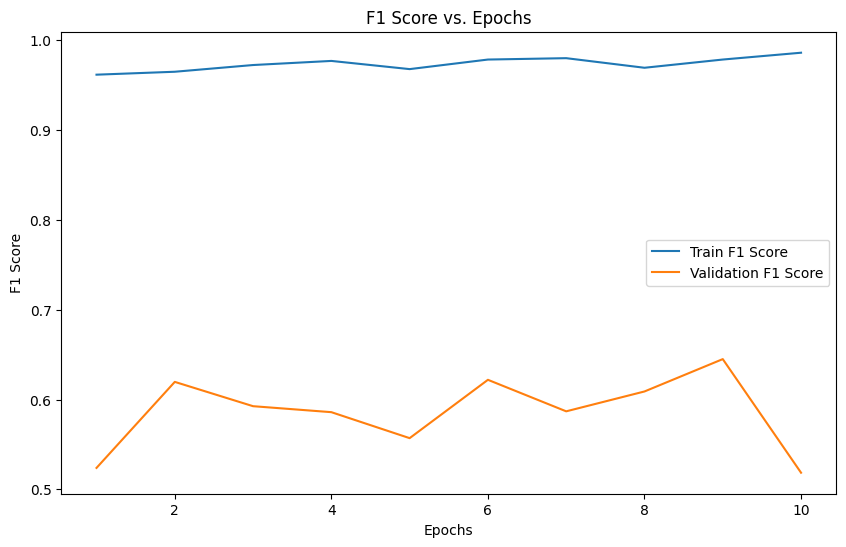

In [ ]:
plt.figure(figsize=(10, 6))
epochs = range(1, len(train_f1_scores) + 1)  # Dynamically adjust to the length of F1 scores list
plt.plot(epochs, train_f1_scores, label='Train F1 Score')
plt.plot(epochs, val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Epochs')
plt.legend()
plt.show()

### g.Calculate the number of trainable parameters in your final model

The **Final Model** is CNN with 2 convolutional layers, 2 fully connected layers and 128 neurons. It's using activation function function of LeakyReLU, without dropout, with L2 regularization, and with optimizer of RMSprop.

In [ ]:
def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

model_l2 = SimpleCNN_LeakyReLU(num_classes=len(train_dataset.classes))
total_trainable_params = count_trainable_params(model_l2)
print(f"Total trainable parameters: {total_trainable_params}")

Total trainable parameters: 25579592
